In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def showGrayImage(img):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(img, cmap='gray')

colors = {
    'Red': (255, 0, 0),
    'Green': (0, 255, 0),
    'Blue': (0, 0, 255),
    'Cyan': (0, 255, 255),
    'Magenta': (255, 0, 255),
    'Yellow': (255, 255, 0),
    'White': (255, 255, 255),
    'Black': (0, 0, 0),
    'Gray': (125, 125, 125),
    'Random': np.random.randint(0,255,(3,)),
    'DarkGray': (50, 50, 50),
    'LightGray': (220, 220, 220)
}

## Some basic intensity transformation functions

Intensity transformations are among the simplest of all image processing techniques.
We denote the values of pixels before and after processing, by r and s. These values are related by a transformation T.
3 types of basic transformations

1. Linear (Negative and Identity)
2. Logarithmic (log and inverse-log)
3. Power law

### Image Negative

$ s = L - 1 - r $

In [2]:
breastXRayImage = cv2.imread('D:/Data/DIP4E/breastXray.tif', cv2.IMREAD_GRAYSCALE)
breastXRayImage.shape

(571, 482)

In [3]:
def negate(img):
    max_value = np.iinfo(img.dtype).max
    return max_value - 1 - img

[Text(0.5, 1.0, 'Negative Image')]

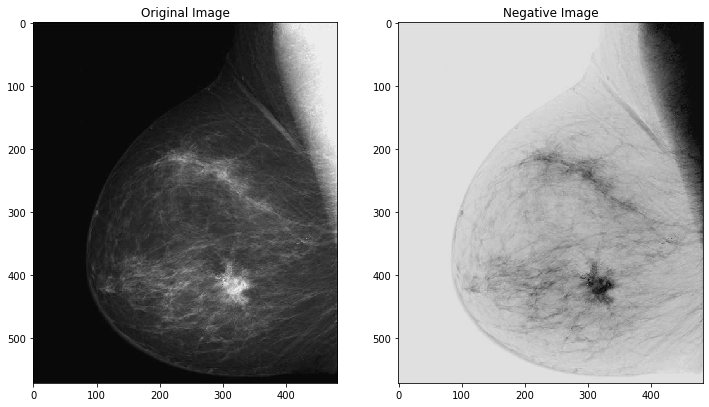

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 10), nrows=1, ncols=2)
ax1.imshow(breastXRayImage, cmap='gray')
ax1.set(title='Original Image')
ax2.imshow(negate(breastXRayImage), cmap='gray')
ax2.set(title='Negative Image')

### Gamma Transformation

s = cr^gamma

* gamma < 1 and gamma > 1 has opposite effects
* gamma = 1, the function is reduced to identity

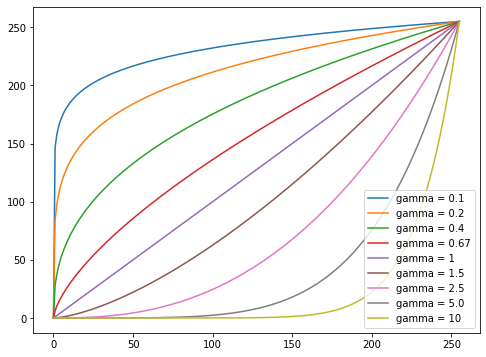

In [139]:
x = np.linspace(0, 255, 255)
gammas = [0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5.0, 10]
fig, ax = plt.subplots(figsize=(8, 6))
for gamma in gammas:
    y = (x/255)**gamma * 255.0
    ax.plot(x, y, label=f'gamma = {gamma}')
ax.legend()
plt.show()

In [152]:
def gamma_transform(img, gamma, c=1.0):
    lut = c*255*(np.arange(256)/255.0)**gamma
    return cv2.LUT(img, lut)

In [148]:
aerialview = cv2.imread('D:/Data/DIP4E/aerialview-washedout.tif', cv2.IMREAD_GRAYSCALE)
aerialview.shape

(768, 764)

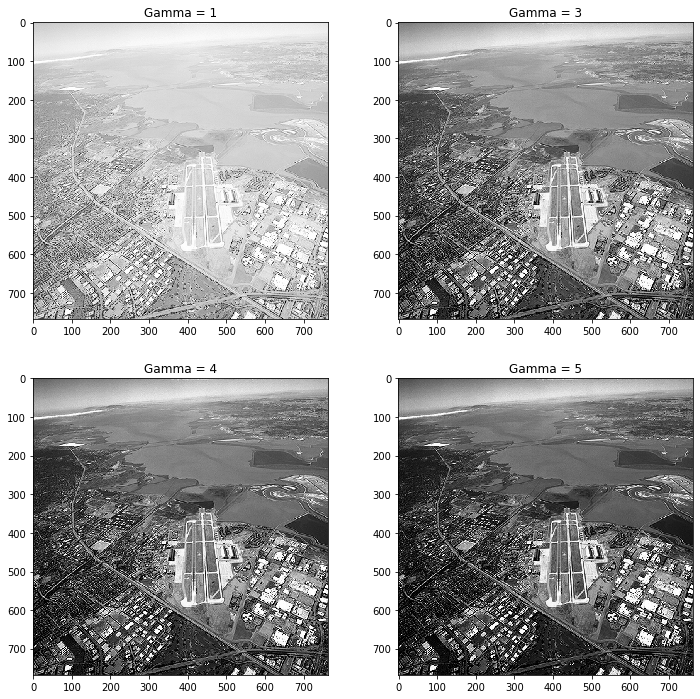

In [171]:
fig = plt.figure(figsize=(12, 12))
gammas = [1, 3, 4, 5]
for i, gamma in enumerate(gammas, 1):
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(gamma_transform(aerialview, gamma), cmap='gray')
    ax.set(title=f'Gamma = {gamma}')
plt.show()

### Histogram Processing

Let $r_k$, for $k = 0,1,2,\cdots,L-1$, denote the intensities of an L-level digital image, $f(x,y)$. The unnormalized histogram of f is defined as

$$ h(r_k) = n_k \text{ for } k = 0,1,2,\cdots,L-1 $$

Where $n_k$ is the number of pixels in $f$ with intensity $r_k$. The *normalized histogram* of $f$ is defined as

$$ p(r_k) = \frac{h(r_k)}{MN} = \frac{n_k}{MN} $$

We could use `cv2.calcHist()` function or `np.histogram` to calculate the histogram of an image.

### Histogram Equalization

Histogram shape is related to image appearance. Dark images have the most populated hisgoram bins are concentrated on the lower (dark) end of the intensity. Similarly, the most populated bins of the light image are biased toward the higher end of the scale. An image with low contrast has a narrow histogram located typically toward the middle of the intensity scale. For a monochrome image, this implies a dull, washed out gray look. The component of a high contrast image cover a wide range of the intensity scale, and the distribution of pixels is not too far from uniform, with few bins being much higher than the others. 

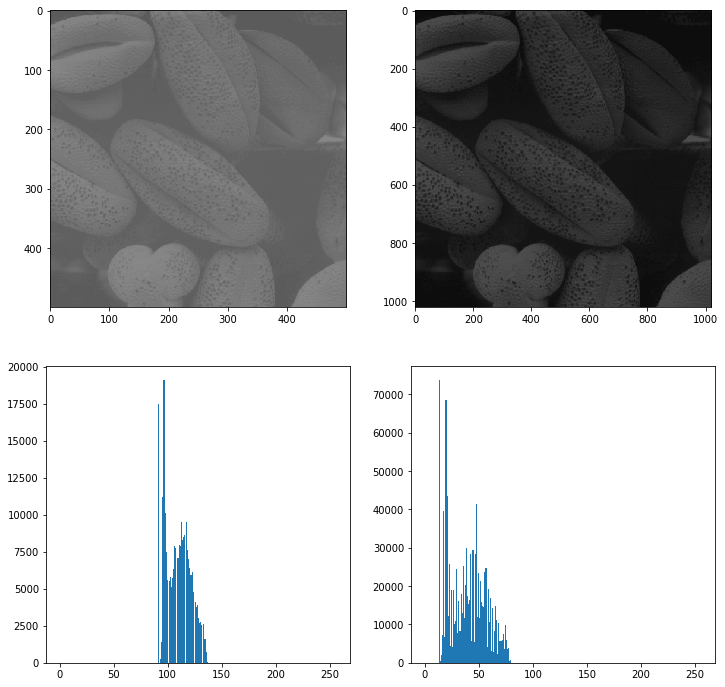

In [170]:
lowcontrast_pollen = cv2.imread('D:/Data/DIP4E/pollen-lowcontrast.tif', cv2.IMREAD_GRAYSCALE)
magnified_pollen = cv2.imread('D:/Data/DIP4E/magnified-pollen-dark.tif', cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,2,1)
ax.imshow(lowcontrast_pollen, cmap='gray', vmin=0, vmax=256)
ax = fig.add_subplot(2,2,2)
ax.imshow(magnified_pollen, cmap='gray', vmin=0, vmax=256)
ax = fig.add_subplot(2,2,3)
ax.hist(lowcontrast_pollen.ravel(), 256, [0,256]);
ax = fig.add_subplot(2,2,4)
ax.hist(magnified_pollen.ravel(), 256, [0,256]);

For $r$ in the range $[0, L-1]$, we focus on transformations (intensity mappings) of the form

$$ s = T(r) \text{ for } 0 \le r \le L - 1 $$

We assume that

* (a) $T(r)$ is a monotonic increasing function in the interval $0 \le r \le L-1$
* (b) $0 \le T(r) \le L - 1$ for $0 \le r \le L - 1$

The intensity of an image may be viewed as a random variable in the interval $[0, L - 1]$. Let $p_r(r)$ and $p_s(s)$ denote the PDFs of intensity values $r$ and $s$. A fundamental result from probability theory is that if $p_r(r)$ and $T(r)$ are known, and $T(r)$ is continuous and differentiable over the range of values of interest, then the PDF of the transformed variable $s$ can be obtained as 

$$ p_s(s) = p_r(r) \Big| \frac{dr}{ds} \Big| $$

A transformation function of a particular importance in image processing is (histogram equalization)

$$ s = T(r) = (L - 1) \int_0^r p_r(w)dw $$

The integral on the right side is the CDF of random variable $r$. 

$$
\begin{split}
\frac{ds}{dr} &= \frac{dT(r)}{dr} \\
 &= (L - 1) \frac{d}{dr} \Big[ \int_0^r p_r(w) dw \Big] \\
 &= (L - 1) p_r(r)
\end{split}
$$

Substituting this result for $dr/ds$ and noting that all probability values are positive, we have

$$
\begin{split}
p_s(s) &= p_r(r) \Big| \frac{dr}{ds} \Big| \\
 &= p_r(r) \Big| \frac{1}{(L-1)p_r(r)}  \Big| \\
 &= \frac{1}{L-1}   &&  0 \le s \le L - 1
\end{split}
$$

So the histogram transformation, transform the origin probability distribution to the uniform probability distribution.

For discreet values, we work with probabilities and summations instead of probability density function and integrals. The discrete form of histogram transformation is

$$ s_k = T(r_k) = (L - 1) \sum_{j = 0}^k p_r(r_j) \text{ for } k = 0,1,2,\cdots,L - 1 $$

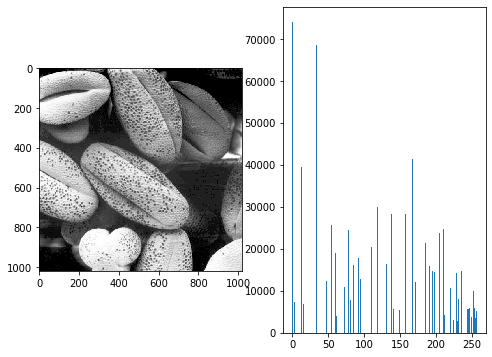

In [173]:
high_contrast_pollen = cv2.equalizeHist(magnified_pollen)
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
ax1.imshow(high_contrast_pollen,cmap='gray')
ax2.hist(high_contrast_pollen.ravel(), 256, [0, 256]);
cv2.imwrite('D:/Data/DIP4E/')

### Histogram Matching

By histogram equalization, we can match a probabilty density function of an image intensity to a uniform distribution. From the uniform distribution, we could match to any distribution that we want.
Let $s$ be a random variable with property

$$ s = T(r) = (L - 1) \int_0^r p_r(w) dw $$

Define a function G (another transformation) on variable z with the property

$$ G(z) = (L - 1) \int_0^z p_z(v) dv = s $$

Therefore $z = G^{-1}(s) $ will provide the intensity of the image that has predefined intensity distribution $p_z$.

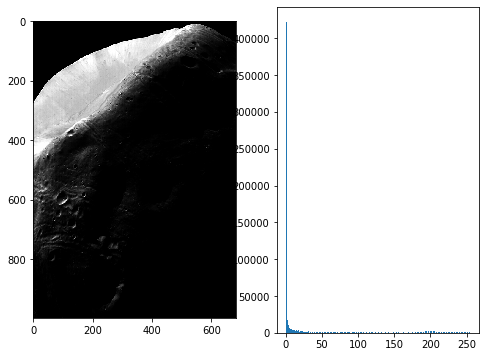

In [176]:
mars_moon_img = cv2.imread('D:/Data/DIP4E/phobos.tif', cv2.IMREAD_GRAYSCALE)
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
ax1.imshow(mars_moon_img, cmap='gray', vmin=0, vmax=255)
ax2.hist(mars_moon_img.ravel(), 256, [0, 255]);

The result of applying histogram equalization to this image

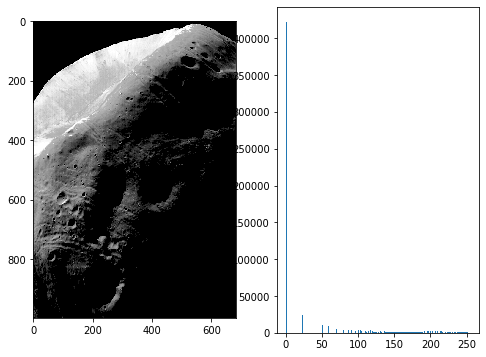

In [178]:
histeq_mars_moon_img = cv2.equalizeHist(mars_moon_img)
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
ax1.imshow(histeq_mars_moon_img, cmap='gray', vmin=0, vmax=255)
ax2.hist(histeq_mars_moon_img.ravel(), 256, [0, 255]);